<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Clasificaci%C3%B3n_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Cargando el conjunto de datos

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Índices de las palabras
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Primera reseña del conjunto de datos de entrenamiento
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
# Decodificando la reseña utilizando los índices de las palabras
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '({})'.format(i)) for i in train_data[0]])

"(1) this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert (2) is an amazing actor and now the same being director (2) father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for (2) and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also (2) to the two little boy's that played the (2) of norman and paul they were just brilliant children are often left out of the (2) list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [8]:
# La reseña anterior se corresponde con una reseña positiva
print(train_labels[0])

1


##2. Preprocesamiento del conjunto de datos

In [9]:
import numpy as np

# Vectorizamos las reseñas convirtiendolas en vectores de 10.000 valores 1s y 0s
def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seqs in enumerate(seqs):
        results[i, seqs] = 1.
    return results

In [10]:
# Para que lo anterior funcione se basa en la siguiente propiedad
a = np.zeros(15)
print('Array original:\t\t', a)
a[[0, 3, 7, 9]] = 1.
print('Array modificado:\t', a)

Array original:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array modificado:	 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Vectorizamos el conjunto de datos de entrenamiento y el de pruebas
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [12]:
# Cada una de las reseñas se corresponde con un vector formado por 1s y 0s
print('Valores originales:\t', train_data[0][:15])
print('Valores vectorizados:\t', X_train[0][:15])

Valores originales:	 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
Valores vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


##3. División del conjunto de datos

In [14]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, test_labels, test_size=0.5)

In [15]:
Y_train = train_labels

In [16]:
print('Longitud subconjunto entrenamiento: ', len(X_train))
print('Longitud subconjunto validación: ', len(X_val))
print('Longitud subconjunto pruebas: ', len(X_test))

Longitud subconjunto entrenamiento:  25000
Longitud subconjunto validación:  12500
Longitud subconjunto pruebas:  12500


##4. Construcción de la red neuronal artificial

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input

model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [19]:
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    validation_data=(X_val, Y_val))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - Precision: 0.5173 - accuracy: 0.5165 - loss: 0.6923 - val_Precision: 0.5636 - val_accuracy: 0.5430 - val_loss: 0.6911
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Precision: 0.5721 - accuracy: 0.5492 - loss: 0.6903 - val_Precision: 0.6275 - val_accuracy: 0.5806 - val_loss: 0.6880
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - Precision: 0.6424 - accuracy: 0.5951 - loss: 0.6864 - val_Precision: 0.6664 - val_accuracy: 0.6367 - val_loss: 0.6822
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Precision: 0.6823 - accuracy: 0.6631 - loss: 0.6790 - val_Precision: 0.6983 - val_accuracy: 0.6985 - val_loss: 0.6712
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - Precision: 0.6925 - accuracy: 0.7019 - loss: 0.6673 - val_Precision: 0.7215 - val_accuracy: 0.7383 - val_loss: 0.6557
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Precision: 0.7289 - accuracy: 0.7429 - loss: 0.6503 - val_Precision: 0.7387 - val_acc

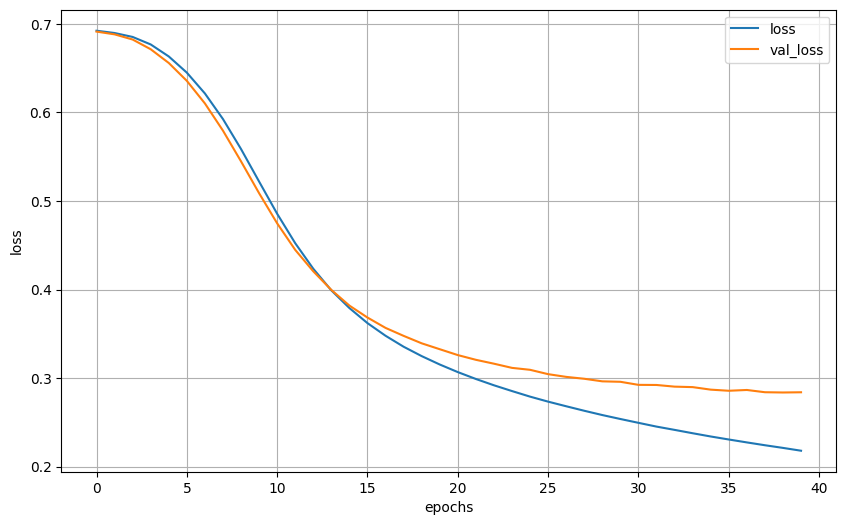

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

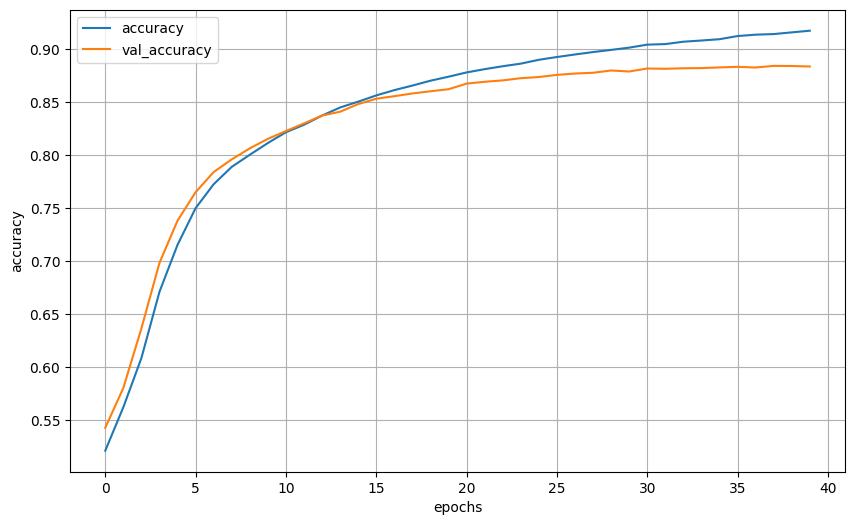

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [22]:
test_loss, test_acc, test_prec = model.evaluate(X_test, Y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8902 - accuracy: 0.8798 - loss: 0.2933


In [23]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.8794400095939636
test_prec: 0.8835093379020691
